<a href="https://www.kaggle.com/code/youssefmohhaj89/house-price-classification-92-accuracy?scriptVersionId=157476018" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

# **previewing the dataset**

In [2]:
df = pd.read_csv("/kaggle/input/house-price/housepricedata.csv")

In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [5]:
 df.isna().sum()

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

In [6]:
df.duplicated().sum()

7

In [7]:
data = df.drop_duplicates()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1453 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1453 non-null   int64
 1   OverallQual       1453 non-null   int64
 2   OverallCond       1453 non-null   int64
 3   TotalBsmtSF       1453 non-null   int64
 4   FullBath          1453 non-null   int64
 5   HalfBath          1453 non-null   int64
 6   BedroomAbvGr      1453 non-null   int64
 7   TotRmsAbvGrd      1453 non-null   int64
 8   Fireplaces        1453 non-null   int64
 9   GarageArea        1453 non-null   int64
 10  AboveMedianPrice  1453 non-null   int64
dtypes: int64(11)
memory usage: 136.2 KB


In [9]:
corr = data.corr()

# **heatmap before dealing with outliers**

<Axes: >

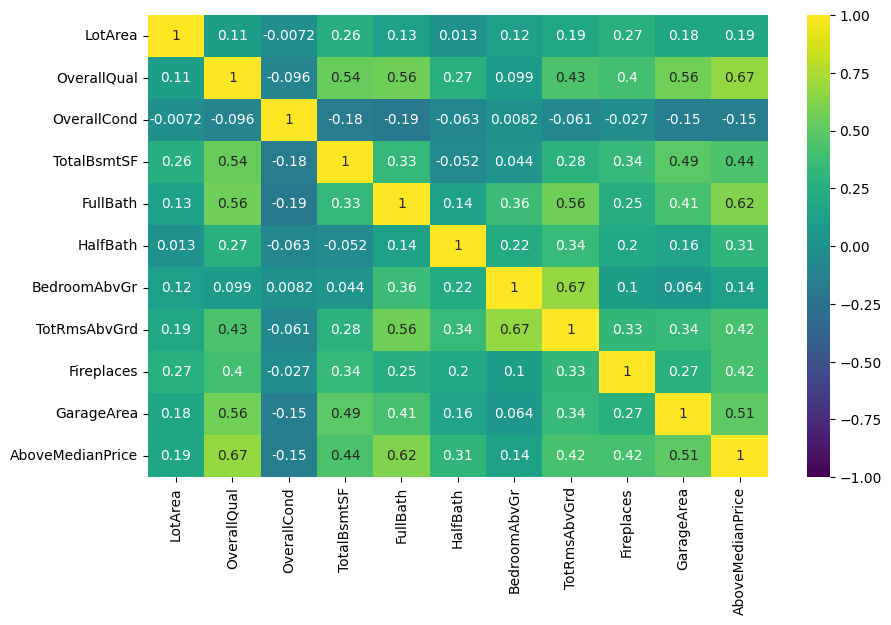

In [10]:
plt.figure(figsize=(10 , 6))
sns.heatmap(corr , vmin = -1 , vmax = 1 , cmap = "viridis" , annot = True)

# **checking for outliers**

<Axes: >

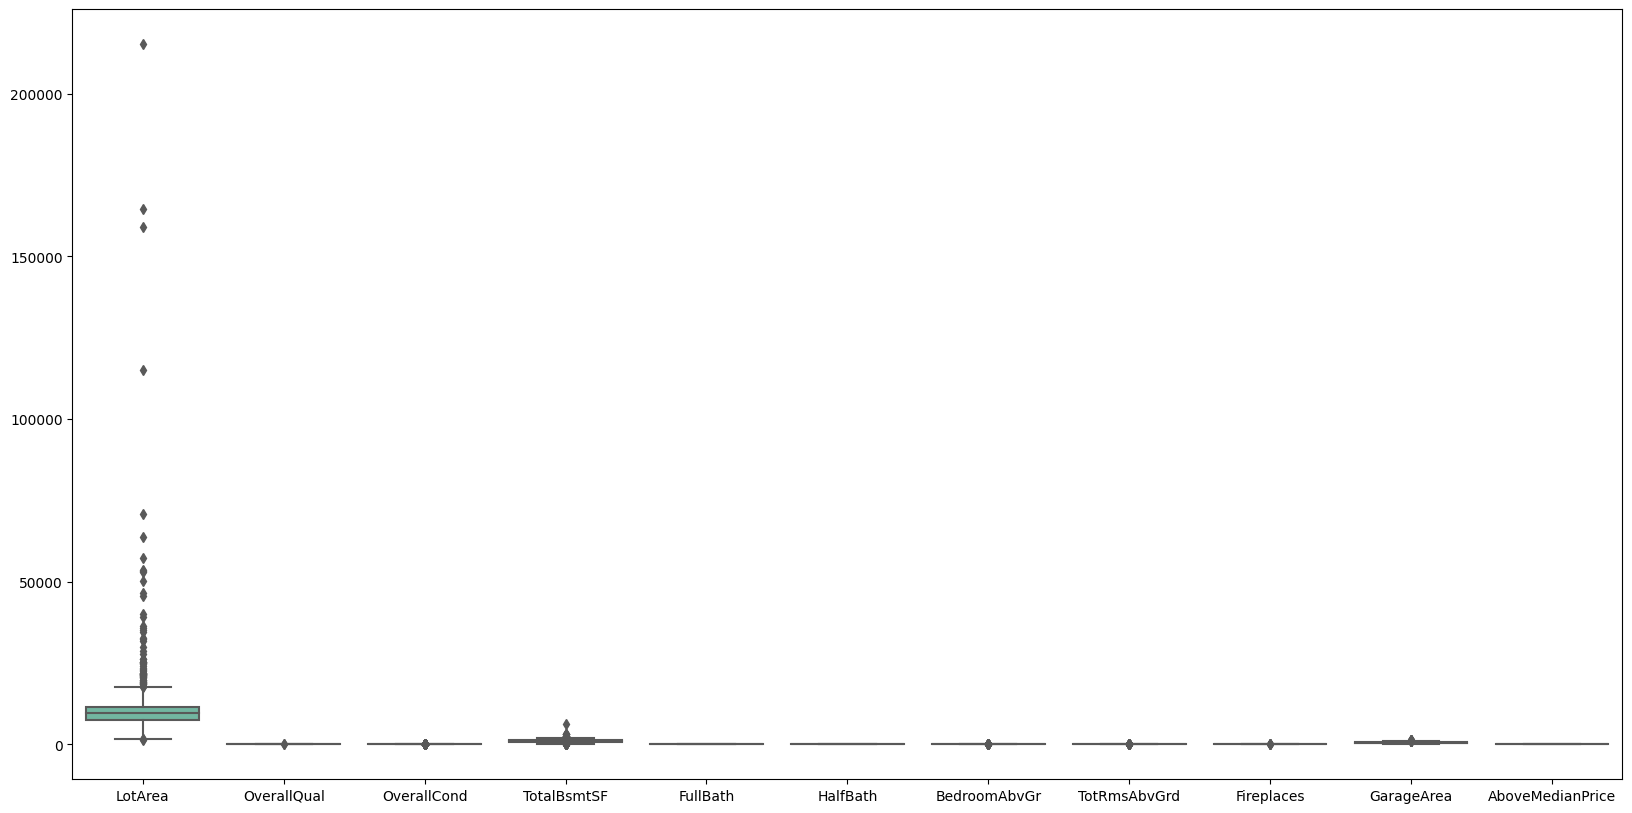

In [11]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, orient="v", palette="Set2")

<Axes: >

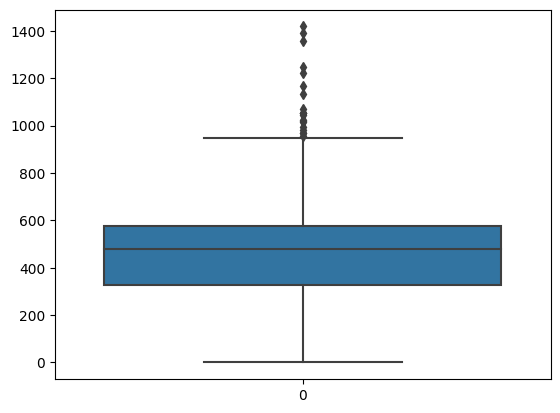

In [12]:
sns.boxplot(data["GarageArea"])

# **dealing with outliers**

In [13]:
def z_score(df, column_name):
    
    x = df[column_name]
    
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = (x < lower_bound) | (x > upper_bound)
    
    df_cleaned = df[~outliers]
    
    return df_cleaned

In [14]:
def winsorize(df, column_name, lower_percentile=0.05, upper_percentile=0.95):
    
    x = df[column_name]
    
    lower_bound = x.quantile(lower_percentile)
    upper_bound = x.quantile(upper_percentile)
    
    
    winsorized_values = np.clip(x, lower_bound, upper_bound)
    
    df_winsorized = df.copy()
    df_winsorized[column_name] = winsorized_values
    
    return df_winsorized

In [15]:
data_cleaned = winsorize(data , "LotArea")

In [16]:
data_cleaned = z_score(data_cleaned , "OverallQual")

In [17]:
data_cleaned = z_score(data_cleaned , "OverallCond")

In [18]:
data_cleaned = winsorize(data_cleaned , "TotalBsmtSF")

In [19]:
data_cleaned = winsorize(data_cleaned , "GarageArea")

In [20]:
data_cleaned = z_score(data_cleaned , "BedroomAbvGr")

In [21]:
data_cleaned = z_score(data_cleaned , "TotRmsAbvGrd")

In [22]:
data_cleaned = z_score(data_cleaned , "Fireplaces")

In [23]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotArea           1276 non-null   float64
 1   OverallQual       1276 non-null   int64  
 2   OverallCond       1276 non-null   int64  
 3   TotalBsmtSF       1276 non-null   float64
 4   FullBath          1276 non-null   int64  
 5   HalfBath          1276 non-null   int64  
 6   BedroomAbvGr      1276 non-null   int64  
 7   TotRmsAbvGrd      1276 non-null   int64  
 8   Fireplaces        1276 non-null   int64  
 9   GarageArea        1276 non-null   float64
 10  AboveMedianPrice  1276 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 119.6 KB


In [24]:
data_cleaned_corr = data_cleaned.corr()

# **heatmap after dealing with outliers**

<Axes: >

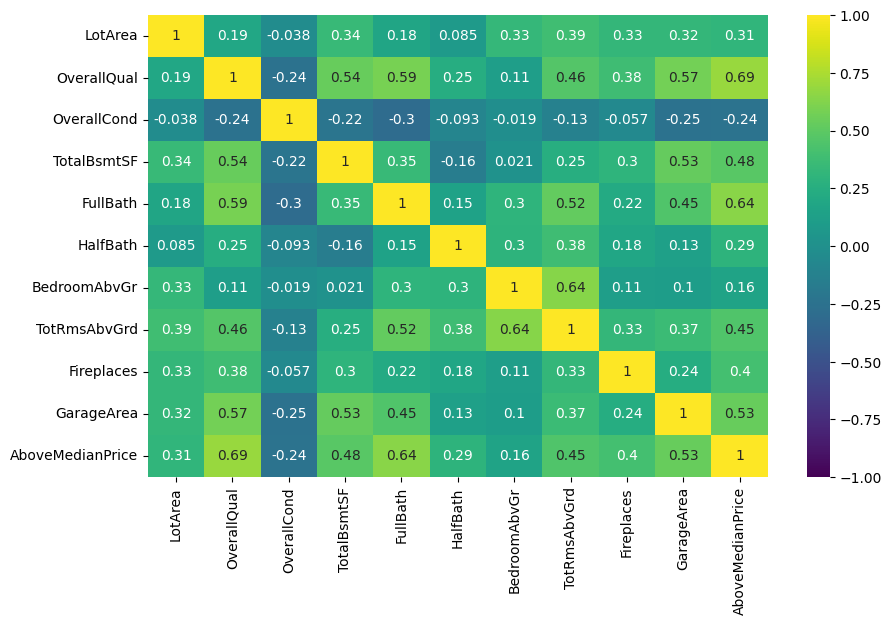

In [25]:
plt.figure(figsize=(10 , 6))
sns.heatmap(data_cleaned_corr , vmin = -1 , vmax = 1 , cmap = "viridis" , annot = True)

# **dealing with imbalance dataset**

In [26]:
num_0 = (data_cleaned["AboveMedianPrice"] == 0).sum()
num_1 = (data_cleaned["AboveMedianPrice"] == 1).sum()

print(num_0)
print(num_1)

616
660


In [27]:
def balance_data(num_to_delete,df,name_of_col):
    
    class_0_rows = df[df[name_of_col] == 1]

    if num_to_delete > len(class_0_rows):
        df = df[df[name_of_col] != 1]
    else:

        rows_to_delete = class_0_rows.sample(n=num_to_delete, random_state=42).index

        df = df.drop(rows_to_delete)

    return df

In [28]:
df = balance_data(44 , data_cleaned , "AboveMedianPrice")

In [29]:
num_0 = (df["AboveMedianPrice"] == 0).sum()
num_1 = (df["AboveMedianPrice"] == 1).sum()

print(num_0)
print(num_1)

616
616


In [30]:
x = df.drop("AboveMedianPrice" , axis= 1)
y = df["AboveMedianPrice"]

In [31]:
x_num = np.array(x)
y_num = np.array(y)

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x_num,y_num,test_size=0.25 , random_state=42)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(924, 10)
(308, 10)
(924,)
(308,)


# **training phase**

In [34]:
z_scaler = StandardScaler()
x_train_scaled = z_scaler.fit_transform(x_train)
x_test_scaled = z_scaler.transform(x_test)

### logistic regression

In [35]:
logreg = LogisticRegression(max_iter=2000,random_state=42)
logreg.fit(x_train_scaled, y_train)

y_pred = logreg.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(classification_rep)

0.9188311688311688
[[138  12]
 [ 13 145]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       150
           1       0.92      0.92      0.92       158

    accuracy                           0.92       308
   macro avg       0.92      0.92      0.92       308
weighted avg       0.92      0.92      0.92       308



### knn

In [36]:
knn = KNeighborsClassifier(n_neighbors= 8)
knn.fit(x_train_scaled , y_train)
y_pred = knn.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(classification_rep)

0.9123376623376623
[[139  11]
 [ 16 142]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       150
           1       0.93      0.90      0.91       158

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.91      0.91      0.91       308



### XGBoost

In [37]:
xgboost = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)

xgboost.fit(x_train_scaled, y_train)
y_pred = xgboost.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(classification_rep)

0.9285714285714286
[[141   9]
 [ 13 145]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       150
           1       0.94      0.92      0.93       158

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.93      0.93      0.93       308



# **XGBoost is the best accuracy**

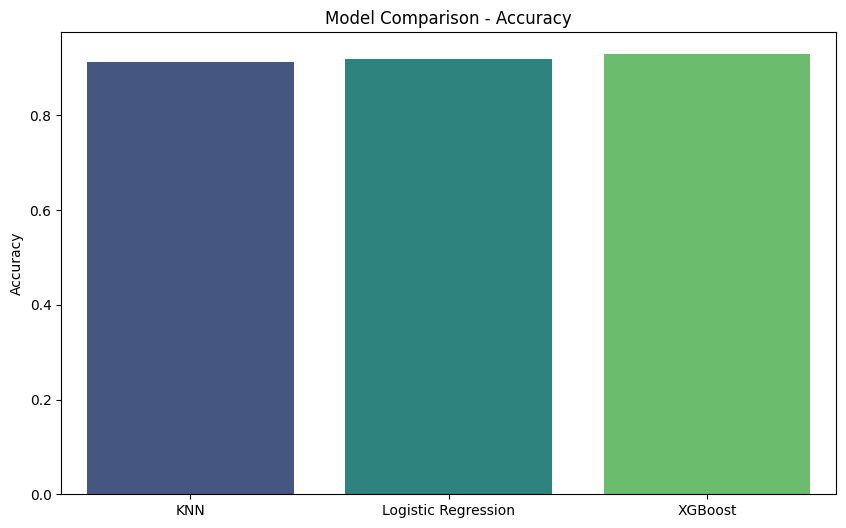

In [38]:
models = [knn, logreg, xgboost]
model_names = ['KNN', 'Logistic Regression', 'XGBoost']

# Train and evaluate each model
accuracies = []

for current_model in models:
    current_model.fit(x_train_scaled, y_train)

    # Get predictions
    y_pred = current_model.predict(x_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()